#Deep Learning con Python
`Autor: Erwing FC 
~erwingforerocastro@gmail.com`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [ ]:
#ver los estilos predefinidos
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [ ]:
#usemos seaborn-colorblind estilo
plt.style.use('seaborn-colorblind')

In [ ]:
np.random.seed(123)
df = pd.DataFrame({'A': np.random.randn(365).cumsum(0), 
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20}, 
                  index=pd.date_range('1/1/2017', periods=365))
df.head()

,A,B,C
2017-01-01,-1.085631,20.059291,-20.230904
2017-01-02,-0.088285,21.803332,-16.659325
2017-01-03,0.194693,20.835588,-17.055481
2017-01-04,-1.311601,21.255156,-17.093802
2017-01-05,-1.890202,21.462083,-19.518638


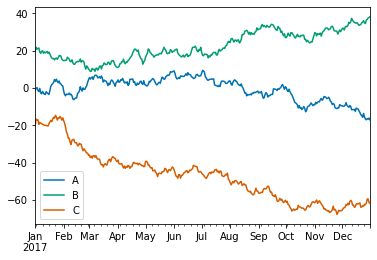

In [ ]:
df.plot()

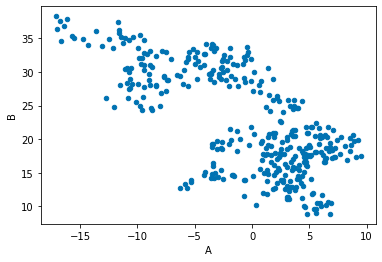

In [ ]:
#trazamos un grafico con los valores de A en "x" y B en "y"
df.plot('A','B', kind = 'scatter')

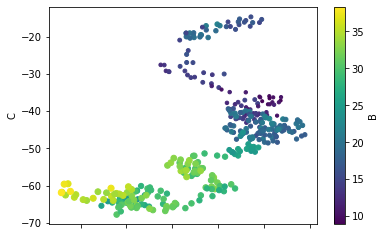

In [ ]:
#trazamos un grafico con los valores de A en "x" y C en "y", con el tamaño de B y el mapa de color de viridis
df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')

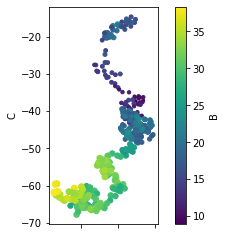

In [ ]:
ax = df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')
ax.set_aspect('equal')

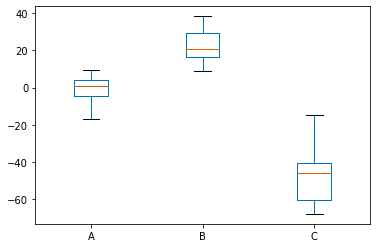

In [ ]:
#bloxplot
df.plot.box()

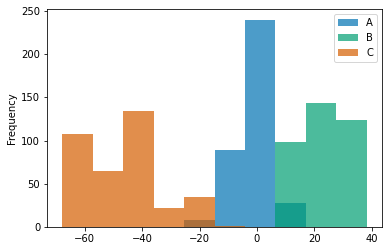

In [ ]:
#histograma
df.plot.hist(alpha=0.7)

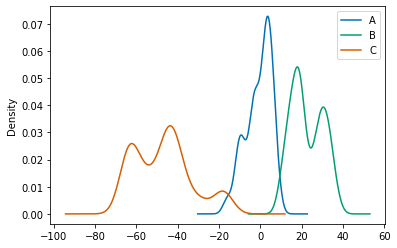

In [ ]:
df.plot.kde()

###Pandas.tools.plotting

In [13]:
from google.colab import files
files.upload() #subimos el archivo localizado en external files / Introduccion data analysis
iris = pd.read_csv('iris.csv')
iris.head()

Saving iris.csv to iris.csv


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa84cb0e320>,
      dtype=object)

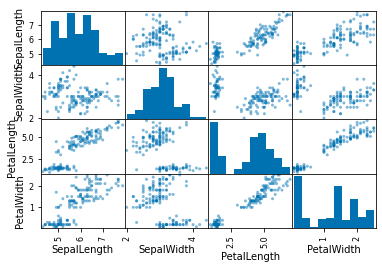

In [16]:
pd.plotting.scatter_matrix(iris)

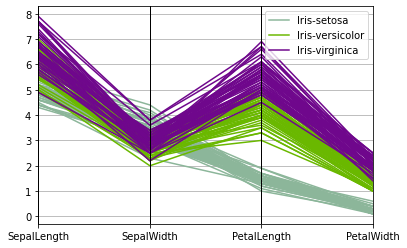

In [17]:
plt.figure()
pd.plotting.parallel_coordinates(iris, 'Name')

#Seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
np.random.seed(1234)

v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2') 

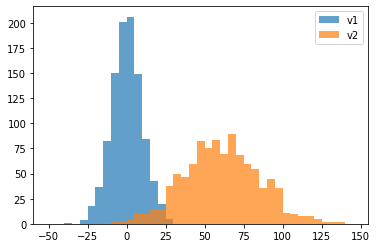

In [3]:
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50,150,5), label='v1');
plt.hist(v2, alpha=0.7, bins=np.arange(-50,150,5), label='v2');
plt.legend()

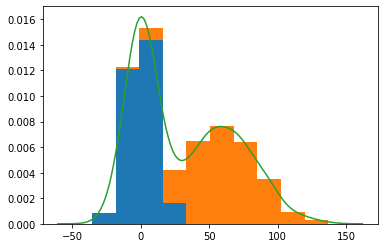

In [6]:
# trazar una estimación de densidad del núcleo sobre un gráfico de barras apiladas 
plt.figure()
plt.hist([v1, v2], histtype='barstacked',density=True);
v3 = np.concatenate((v1,v2))
sns.kdeplot(v3);

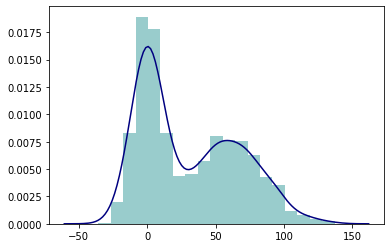

In [7]:
plt.figure()
# podemos pasar argumentos de palabras clave para cada componente individual de la trama
sns.distplot(v3, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'})

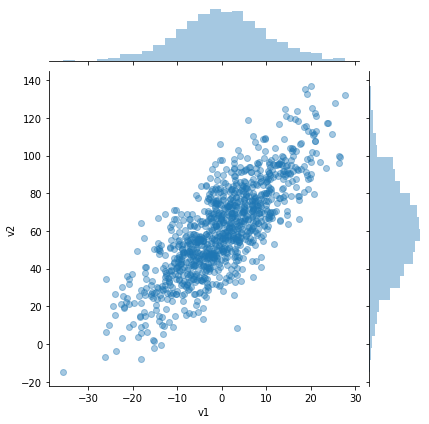

In [8]:
#crear una grafica conjunta
sns.jointplot(v1, v2, alpha=0.4)

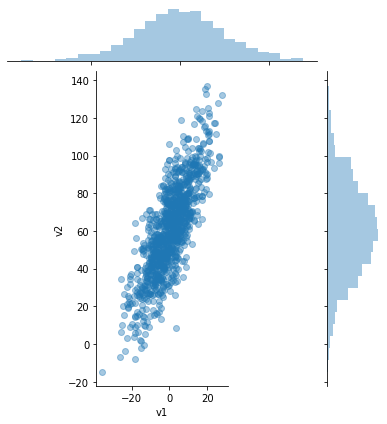

In [9]:
grid = sns.jointplot(v1, v2, alpha=0.4);
grid.ax_joint.set_aspect('equal')

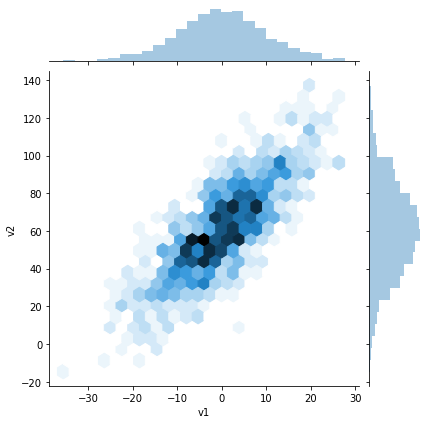

In [10]:
sns.jointplot(v1, v2, kind='hex')

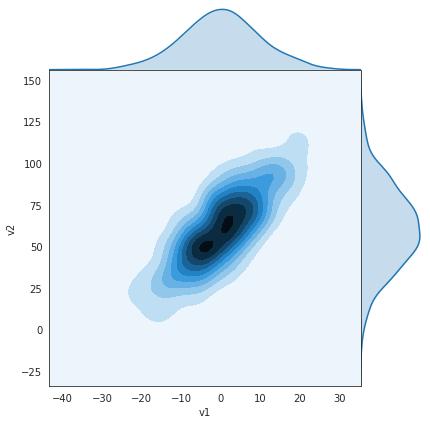

In [11]:
sns.set_style('white')

sns.jointplot(v1, v2, kind='kde', space=0)

In [12]:
iris = pd.read_csv('iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


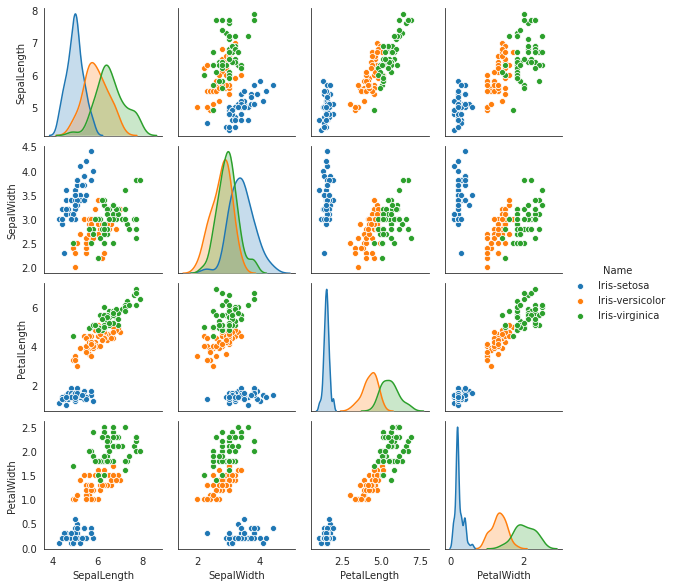

In [15]:
sns.pairplot(iris, hue='Name', diag_kind='kde', size=2)

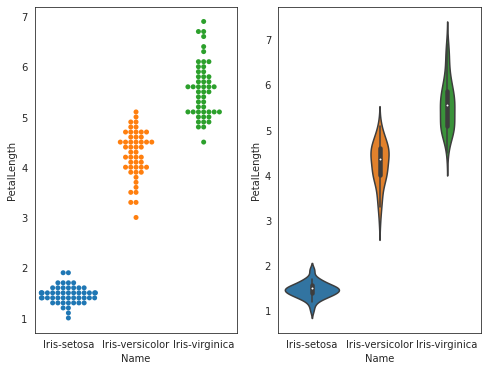

In [17]:
plt.figure(figsize=(8,6))
plt.subplot(121)
sns.swarmplot('Name', 'PetalLength', data=iris)
plt.subplot(122)
sns.violinplot('Name', 'PetalLength', data=iris)